## Basic data set generation

In [6]:
import numpy as np
import os
#from scipy.misc import imread, imresize
from imageio import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /home/ubuntu/git-repos/TF-Tutorial/Sources


### Specify the folder path

In [2]:
paths = {'../Data/Img/G70/'
        ,'../Data/Img/G80/'
        ,'../Data/Img/G90/'}
# Reshape size
imgsize = [64,64]
# Grayscale
use_gray = 1
# Save name
data_name = 'genesis_data'

print('Your imgs path :')
for i, path in enumerate(paths):
    print(' [%d/%d] %s/%s' %(i, len(paths), cwd, path))

print('Data will be saved to %s'
     %(cwd + '/data/' + data_name + '.npz'))


Your imgs path :
 [0/3] /home/ubuntu/git-repos/TF-Tutorial/Sources/../Data/Img/G90/
 [1/3] /home/ubuntu/git-repos/TF-Tutorial/Sources/../Data/Img/G70/
 [2/3] /home/ubuntu/git-repos/TF-Tutorial/Sources/../Data/Img/G80/
Data will be saved to /home/ubuntu/git-repos/TF-Tutorial/Sources/data/genesis_data.npz


### RGB 2 GRAY function

In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

### Load images

In [7]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # Convert to grayscale  
        if use_gray:
            grayimg  = rgb2gray(currimg)
        else:
            grayimg  = currimg
        # Reshape
        graysmall = resize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec   = np.reshape(graysmall, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = grayvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Total 10 images loaded.


### Divide into trn and test dataset

In [12]:
def print_shape(string, x):
    print('Shape of %s is %s' %(string, x.shape,))

randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)


Shape of trainimg is (6, 4096)
Shape of trainlabel is (6, 3)
Shape of testimg is (4, 4096)
Shape of testlabel is (4, 3)


### Save to NPZ

In [15]:
savepath = '../Data/' + data_name + '.npz'
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
        , testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print('Saved to %s' %(savepath))

Saved to ../Data/genesis_data.npz


### Load to check!

In [20]:
# Load them!
loadpath = '../Data/' + data_name + '.npz'
l = np.load(loadpath)

print(l.files)

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray']
6 train images loaded
4 test images loaded
Loaded from to ../Data/genesis_data.npz


### Plot randomly selected trn images

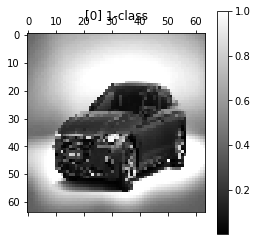

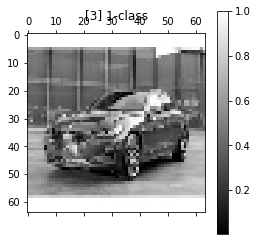

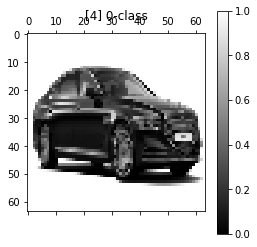

In [21]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 3;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()